In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/rentsmart.csv")

In [16]:
#remove missing data
df = df.dropna()

#remove 00:00:00 behind date
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df['date'] = df['date'].dt.date

#fliter zip codes and add 0 in front
d7_zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]
df['zip_code'] = df['zip_code'].apply(lambda x: str(x).zfill(5))
df = df[df['zip_code'].isin(d7_zip_codes)]

#fliter neighborhoods
d7_neighborhood = ["Dorchester", "Fenway", "Roxbury", "South End"]
df = df[df['neighborhood'].isin(d7_neighborhood)].copy()

#remove .0 behind year_built and year_remodeled
df['year_remodeled'] = df['year_remodeled'].astype(int)
df['year_built'] = df['year_built'].astype(int)

#group very similar descriptions
replace_dict = {
    "Work w/out Permit": "Work Without Permit",
    "Work without permit": "Work Without Permit",
    "Working Without a Permit": "Work Without Permit",
    "Working Without Electrical Permit": "Work Without Permit", 
    "Unsafe Strcuture": "Unsafe Structures"
}

df['description'] = df['description'].replace(replace_dict)

df

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year_built,year_remodeled,property_type,latitude,longitude
0,2024-10-02,Enforcement Violations,Improper storage trash: res,"1081-1083 Dorchester Ave, 02125",Dorchester,02125,1302139000,DORCHESTER FIRST REALTY TRUST,1905,2014,Residential 3-family,42.313779,-71.057314
2,2024-10-02,Enforcement Violations,Improper storage trash: res,"6 Dawes Ter, 02125",Dorchester,02125,703977000,MADEK CHARLES V,1905,1970,Residential 3-family,42.318930,-71.060761
8,2024-10-02,Enforcement Violations,Overfilling of barrel/dumpster,"7 Bakersfield St, 02125",Dorchester,02125,1301796000,CESCO LLC MASS LLC,1936,1981,Residential 7 or more units,42.317846,-71.060866
66,2024-10-01,Enforcement Violations,Overgrown Weeds On Property,"27 Woodbine St, 02119",Roxbury,02119,1200848000,WHITE GILBERT G III,1890,2010,Residential 1-family,42.318880,-71.079861
83,2024-10-01,Enforcement Violations,illegal parking prop owner 1,"2 Humboldt Ave, 02119",Roxbury,02119,1201598250,TWO HUMBOLDT AV CONDO TR,1999,1999,Condominium Main*,42.320570,-71.085741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342054,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"45 Dwight St #A, 02118",Roxbury,02118,305741000,HISTORIC SOUTH END LP MASS LP,1900,1990,Residential 7 or more units,42.344531,-71.069138
342062,2019-10-29,Housing Complaints,Plumbing,"610 Tremont St, 02118",Roxbury,02118,900091000,PHIL C BRADLEY HOUSING,1920,1998,Mixed Use (Res. and Comm.),42.342540,-71.073708
342063,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"56 Bowdoin Ave #4, 02121",Dorchester,02121,1401292000,ALLEN MARY ANN,1950,2004,Residential 7 or more units,42.301370,-71.074491
342070,2019-10-29,Housing Complaints,Rental Unit Delivery Conditions,"5 S Charlame Ct, 02119",Roxbury,02119,1201125000,CHARLAME PARK HOMES I COOP,1964,1990,Residential 7 or more units,42.319490,-71.085619


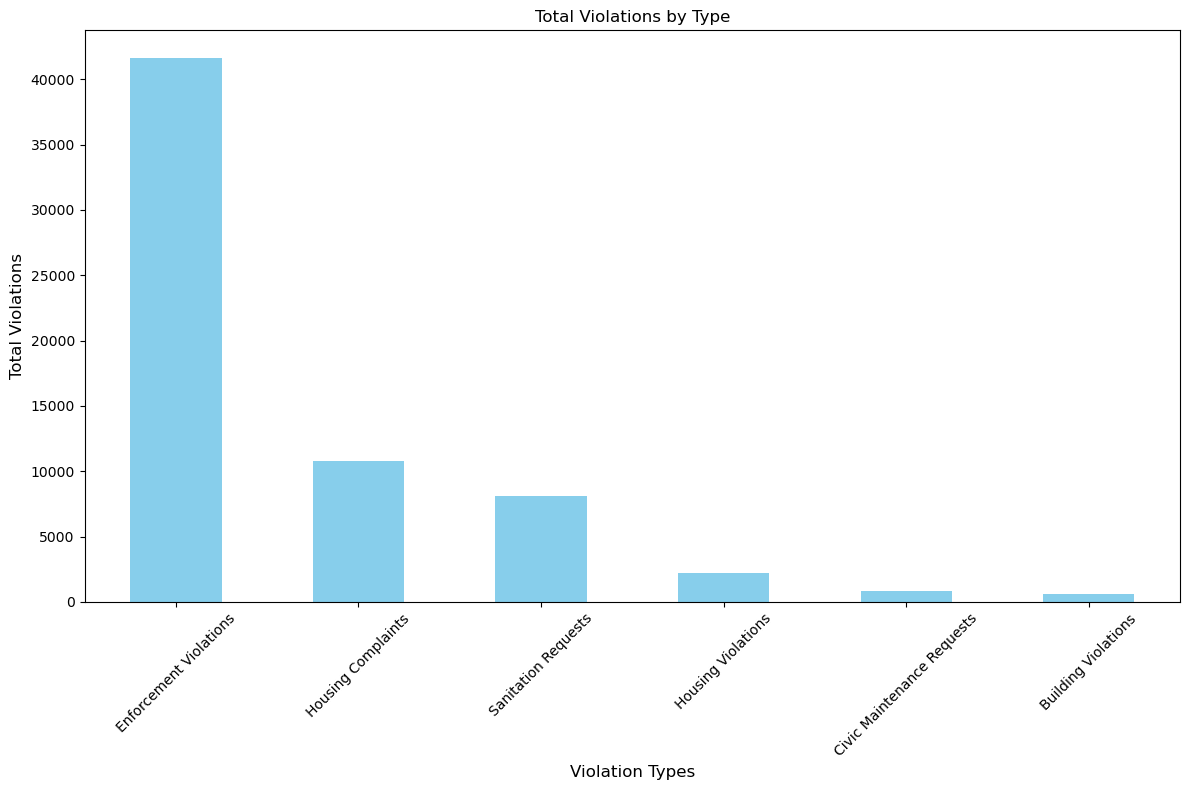

In [17]:
violation_counts = df['violation_type'].value_counts()

plt.figure(figsize=(12, 8))
violation_counts.plot(kind='bar', color='skyblue')

plt.title('Total Violations by Type', fontsize=12)
plt.xlabel('Violation Types', fontsize=12)
plt.ylabel('Total Violations', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

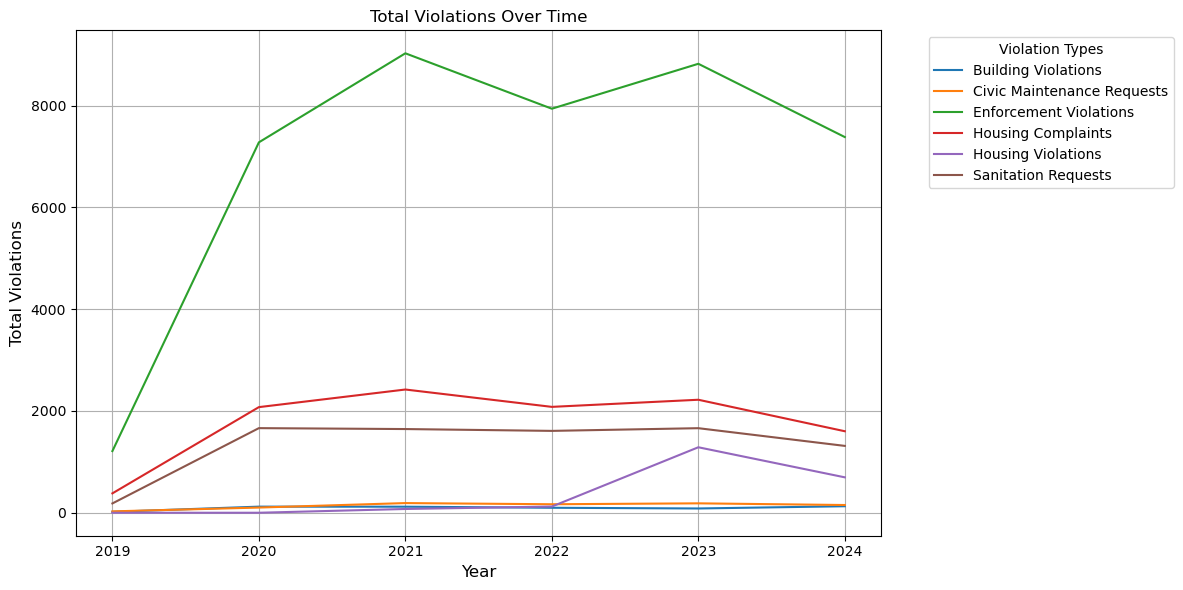

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df['year'] = df['date'].dt.year

df_grouped = df.groupby(['year', 'violation_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

for violation_type in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[violation_type], label=violation_type)

plt.title('Total Violations Over Time', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Violations', fontsize=12)
plt.legend(title='Violation Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

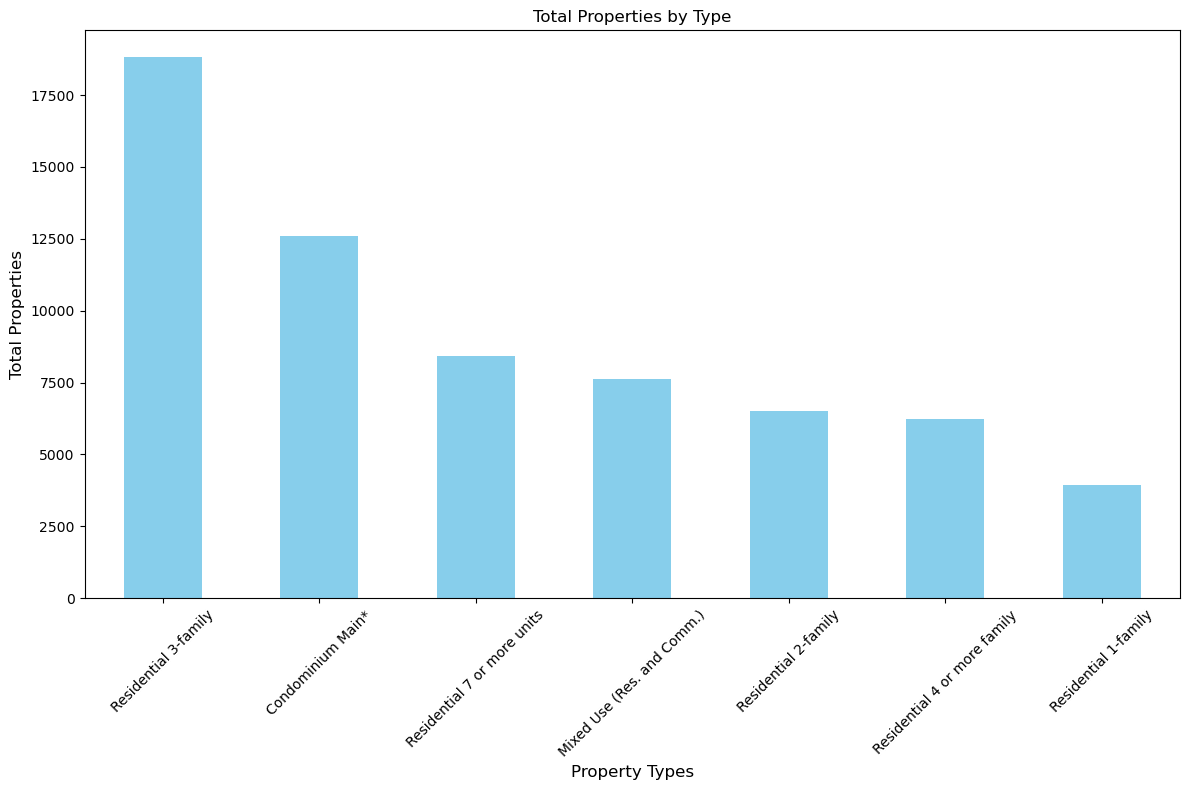

In [19]:
property_counts = df['property_type'].value_counts()

plt.figure(figsize=(12, 8))
property_counts.plot(kind='bar', color='skyblue')

plt.title('Total Properties by Type', fontsize=12)
plt.xlabel('Property Types', fontsize=12)
plt.ylabel('Total Properties', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

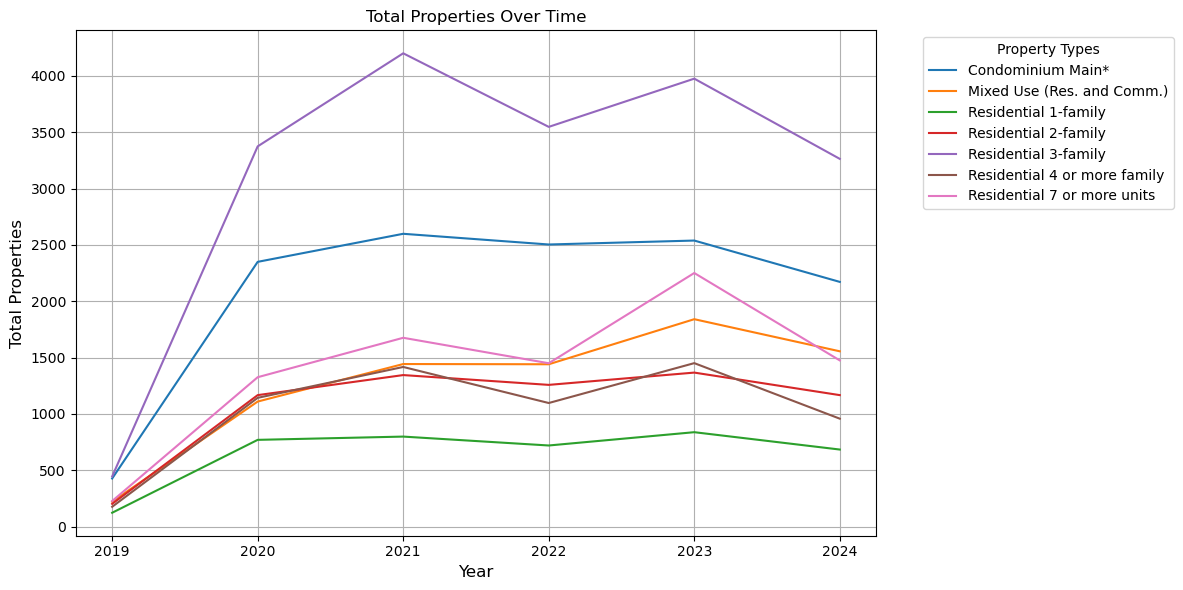

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df['year'] = df['date'].dt.year

df_grouped = df.groupby(['year', 'property_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

for property_type in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[property_type], label=property_type)

plt.title('Total Properties Over Time', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Properties', fontsize=12)
plt.legend(title='Property Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
#save as new csv file
df.to_csv("/Users/ann/Desktop/d7-rentsmart.csv", index=False)